In [14]:
import xarray as xr


In [15]:
# !pip install dask


In [16]:
import os

directory_1 = 'future_msl'  # Replace with your directory path
file_pattern_1 = 'future_msl_{}_01_v1.nc'
years_1 = range(2021, 2051)  # 2015 to 2050

# Create a list of file paths
file_paths_1 = [os.path.join(directory_1, file_pattern_1.format(year)) for year in years_1]

# Open multiple files and combine them into a single dataset
ds_1 = xr.open_mfdataset(file_paths_1, combine='by_coords')


In [17]:
directory_0 = 'historical_msl'  # Replace with your directory path
file_pattern_0 = 'historical_msl_{}_01_v1.nc'
years_0 = range(1985, 2014)  # 2015 to 2050

# Create a list of file paths
file_paths_0 = [os.path.join(directory_0, file_pattern_0.format(year)) for year in years_0]

# Open multiple files and combine them into a single dataset
ds_0 = xr.open_mfdataset(file_paths_0, combine='by_coords')

In [18]:
print(ds_0)


<xarray.Dataset>
Dimensions:               (stations: 43119, time: 29)
Coordinates:
    station_x_coordinate  (stations) float64 dask.array<chunksize=(43119,), meta=np.ndarray>
    station_y_coordinate  (stations) float64 dask.array<chunksize=(43119,), meta=np.ndarray>
  * time                  (time) datetime64[ns] 1985-01-01 ... 2013-01-01
  * stations              (stations) uint16 0 1 2 3 ... 43730 43731 43732 43733
Data variables:
    mean_sea_level        (stations, time) float32 dask.array<chunksize=(43119, 1), meta=np.ndarray>
Attributes: (12/35)
    Conventions:                   CF-1.6
    featureType:                   timeSeries
    id:                            annual_msl
    naming_authority:              https://deltares.nl/en
    Metadata_Conventions:          Unidata Dataset Discovery v1.0
    title:                         Annual mean sea level
    ...                            ...
    time_coverage_start:           1985-01-01
    time_coverage_end:             1985

In [19]:
# to dataframe
df_0 = ds_0.to_dataframe()
df_1 = ds_1.to_dataframe()


In [20]:
print(df_0['mean_sea_level'].describe())
print(df_1['mean_sea_level'].describe())

count    1.250451e+06
mean     6.730551e-03
std      2.074410e-02
min     -2.160000e-01
25%     -5.000000e-03
50%      2.000000e-03
75%      2.000000e-02
max      1.390000e-01
Name: mean_sea_level, dtype: float64
count    1.293570e+06
mean     1.394137e-01
std      8.885027e-02
min     -7.630000e-01
25%      9.900000e-02
50%      1.440000e-01
75%      1.970000e-01
max      5.060000e-01
Name: mean_sea_level, dtype: float64


In [21]:
df_0.head()

station_x_coordinate  station_y_coordinate  \
stations time                                                     
0        1985-01-01                24.089                34.827   
         1986-01-01                24.089                34.827   
         1987-01-01                24.089                34.827   
         1988-01-01                24.089                34.827   
         1989-01-01                24.089                34.827   

                     mean_sea_level  
stations time                        
0        1985-01-01          -0.017  
         1986-01-01          -0.015  
         1987-01-01          -0.014  
         1988-01-01          -0.013  
         1989-01-01          -0.011

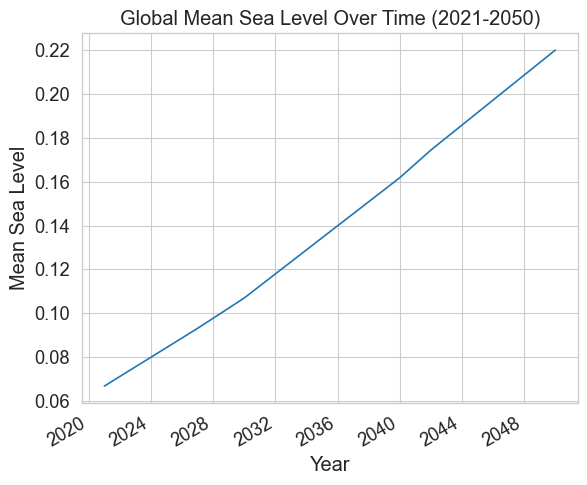

In [22]:
import matplotlib.pyplot as plt

# Assuming 'mean_sea_level' is the variable of interest
# This will calculate the mean sea level across all stations for each time point
mean_sea_level_over_time = ds_1['mean_sea_level'].mean(dim='stations')

# Now plot this as a simple line plot
mean_sea_level_over_time.plot()
plt.title('Global Mean Sea Level Over Time (2021-2050)')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level')
plt.show()

# (Aggregated Across Stations)

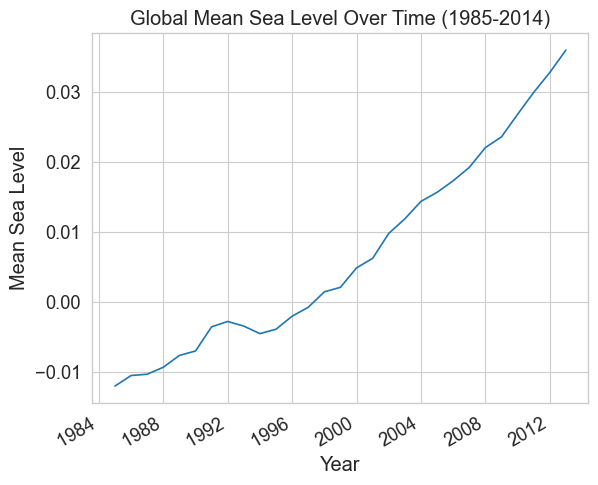

In [23]:
mean_sea_level_over_time_0 = ds_0['mean_sea_level'].mean(dim='stations')

# Now plot this as a simple line plot
mean_sea_level_over_time_0.plot()
plt.title('Global Mean Sea Level Over Time (1985-2014)')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level')
plt.show()

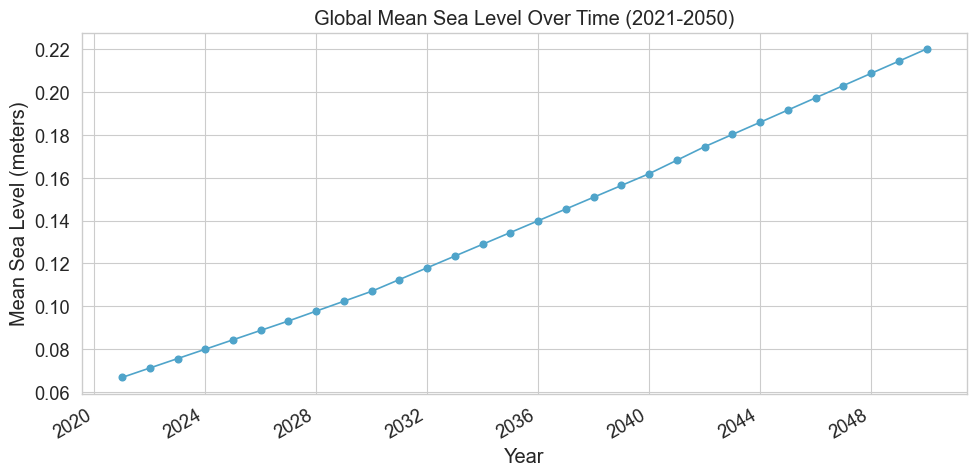

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)

# Assuming 'mean_sea_level' is the variable of interest for future dataset
mean_sea_level_over_time = ds_1['mean_sea_level'].mean(dim='stations')

# Plot for the future dataset
plt.figure(figsize=(10, 5))
mean_sea_level_over_time.plot(marker='o', linestyle='-', color='#4FA4CA')
plt.title('Global Mean Sea Level Over Time (2021-2050)')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level (meters)')
plt.grid(True)
plt.tight_layout()
plt.savefig('global_msl_future.png', dpi=300)  # Save the figure with high resolution
plt.show()


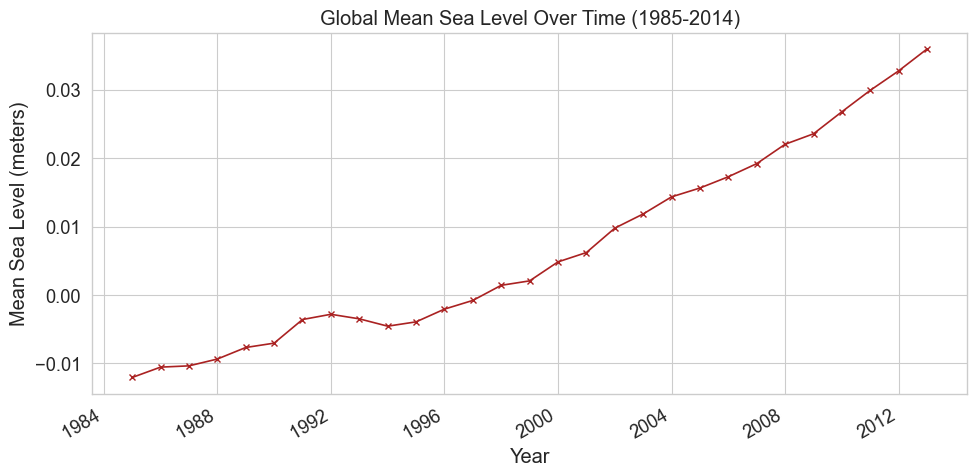

In [25]:

# Assuming 'mean_sea_level' is the variable of interest for historical dataset
mean_sea_level_over_time_0 = ds_0['mean_sea_level'].mean(dim='stations')

# Plot for the historical dataset
plt.figure(figsize=(10, 5))
mean_sea_level_over_time_0.plot(marker='x', linestyle='-', color='#AA2222')
plt.title('Global Mean Sea Level Over Time (1985-2014)')
plt.xlabel('Year')
plt.ylabel('Mean Sea Level (meters)')
plt.grid(True)
plt.tight_layout()
plt.savefig('global_msl_historical.png', dpi=300)  # Save the figure with high resolution
plt.show()


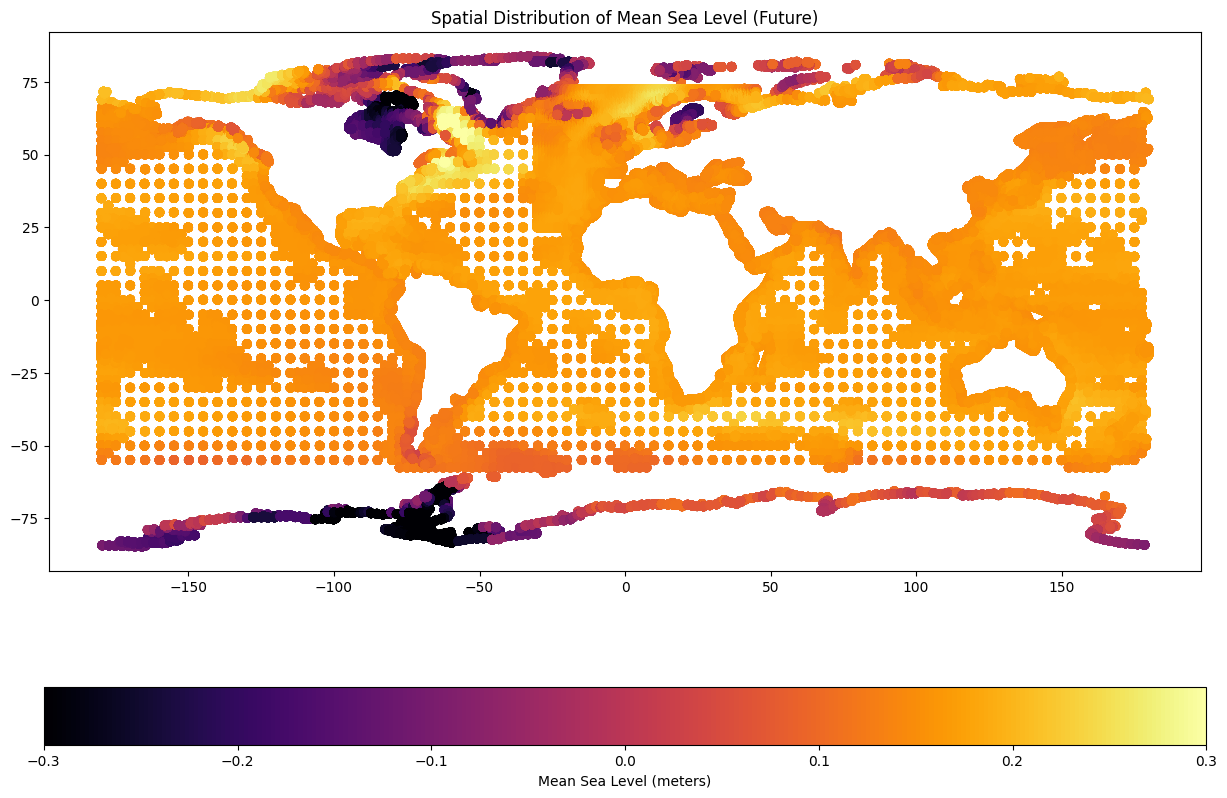

In [13]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame
future_gdf = gpd.GeoDataFrame(
    df_1.reset_index(),  # Reset index to ensure the DataFrame has a suitable index
    geometry=gpd.points_from_xy(df_1.station_x_coordinate, df_1.station_y_coordinate)
)

# Aggregate mean sea level change per station
# This creates a new DataFrame with 'stations' as the index and the mean values as a column
station_mean_sea_level_1 = future_gdf.groupby('stations')['mean_sea_level'].mean().reset_index()

# Merge this back into the original GeoDataFrame
future_gdf = future_gdf.merge(station_mean_sea_level_1, on='stations', suffixes=('', '_mean'))


# Set a consistent color range for both plots
vmin_1, vmax_1 = -0.3, 0.3  # Replace with the actual min and max values relevant to your data

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
future_gdf.plot(
    column='mean_sea_level_mean',
    ax=ax,
    legend=True,
    vmin=vmin_1,
    vmax=vmax_1,
    cmap='inferno',  # Choose a colormap that suits your data well
    legend_kwds={'label': "Mean Sea Level (meters)", 'orientation': "horizontal"}
)
plt.title('Spatial Distribution of Mean Sea Level (Future)')
plt.show()


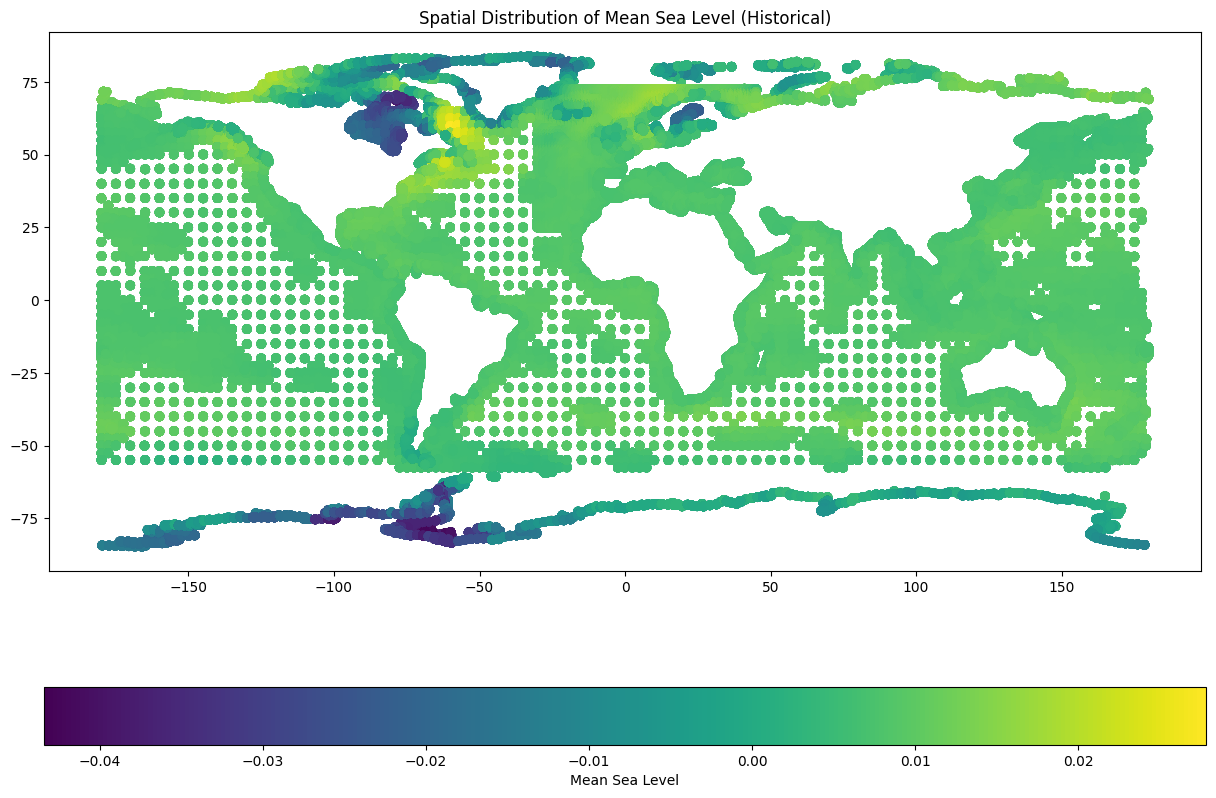

In [12]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Create a GeoDataFrame
historical_gdf = gpd.GeoDataFrame(
    df_0.reset_index(),  # Reset index to ensure the DataFrame has a suitable index
    geometry=gpd.points_from_xy(df_0.station_x_coordinate, df_0.station_y_coordinate)
)

# Aggregate mean sea level change per station
# This creates a new DataFrame with 'stations' as the index and the mean values as a column
station_mean_sea_level_0 = historical_gdf.groupby('stations')['mean_sea_level'].mean().reset_index()

# Merge this back into the original GeoDataFrame
historical_gdf = historical_gdf.merge(station_mean_sea_level_0, on='stations', suffixes=('', '_mean'))

# Now when plotting, use the new column with mean values
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
historical_gdf.plot(column='mean_sea_level_mean', ax=ax, legend=True,
         legend_kwds={'label': "Mean Sea Level", 'orientation': "horizontal"})
plt.title('Spatial Distribution of Mean Sea Level (Historical)')
plt.show()

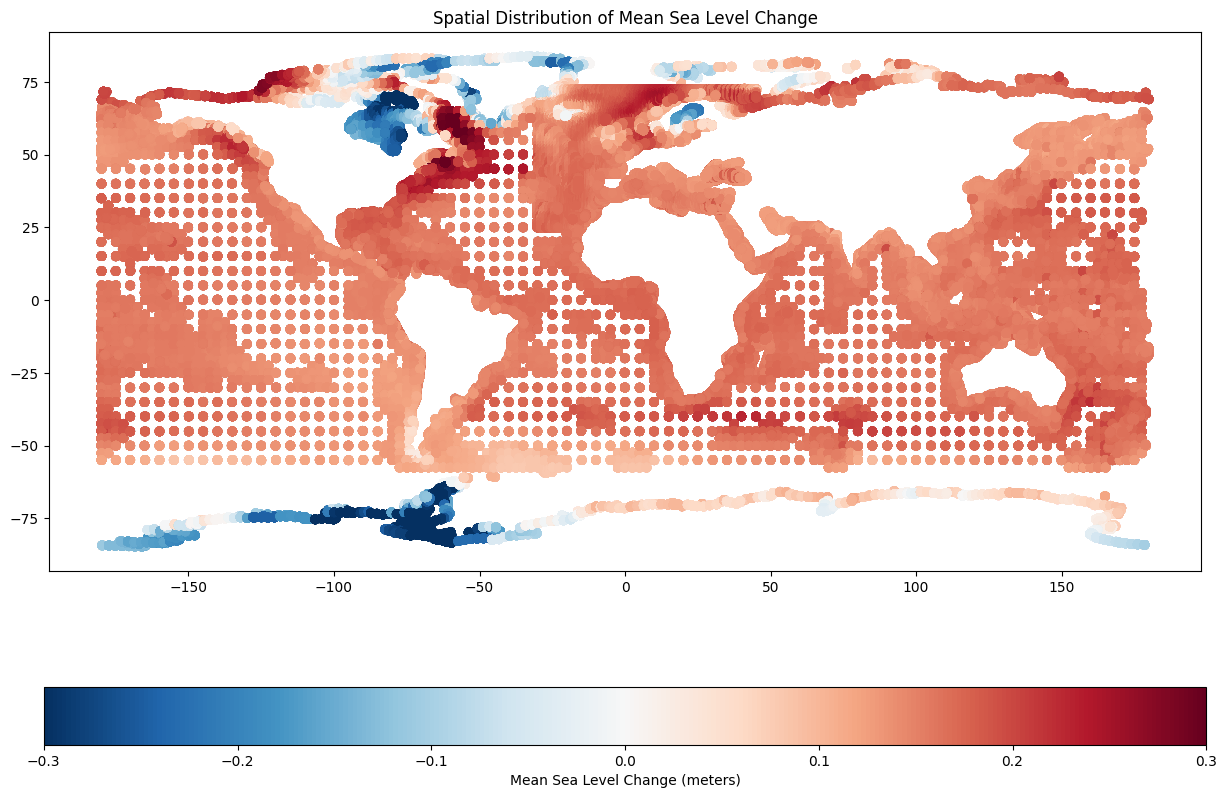

In [17]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Calculate the mean sea level change between future and historical datasets
# This assumes future_gdf and historical_gdf are already defined and contain 'mean_sea_level_mean'
change_gdf = future_gdf.copy()
change_gdf['mean_sea_level_change'] = future_gdf['mean_sea_level_mean'] - historical_gdf['mean_sea_level_mean']

# Now when plotting, use the new column with mean sea level change
fig, ax = plt.subplots(1, 1, figsize=(15, 10))
change_gdf.plot(
    column='mean_sea_level_change',
    ax=ax,
    legend=True,
    vmin=-0.3,  # Set to appropriate min value
    vmax=0.3,   # Set to appropriate max value
    cmap='RdBu_r',  # A diverging colormap
    legend_kwds={'label': "Mean Sea Level Change (meters)", 'orientation': "horizontal"}
)
plt.title('Spatial Distribution of Mean Sea Level Change')
plt.show()


In [20]:
import folium
from folium.plugins import HeatMap

# Assuming `df` is your DataFrame with the appropriate columns
# df = ...

# Prepare the data for the heatmap
# Ensure that the mean sea level data is suitable for use as a weight. It should be a positive number where higher values indicate more intensity
heatmap_data = df[['station_y_coordinate', 'station_x_coordinate', 'mean_sea_level']].dropna()

# Create a map centered around the mean latitude and longitude of your data
map_center = heatmap_data[['station_y_coordinate', 'station_x_coordinate']].mean().values.tolist()
m = folium.Map(location=map_center, zoom_start=5)

# Add the heatmap to the map. Each point in the heatmap_data will have a 'weight' given by the mean sea level
HeatMap(data=heatmap_data.values.tolist(), radius=15).add_to(m)

# Save the map to an HTML file
output_filepath = 'australia_heatmap_future.html'
m.save(output_filepath)

# Display the link to the saved HTML file if not running in a Jupyter notebook
output_filepath


'australia_heatmap_future.html'

In [26]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.nonparametric.smoothers_lowess import lowess

# If 'df' has a MultiIndex, extract the level with the 'time' information
# Let's assume 'time' is at level 1 of the index
df_0['year'] = df_0.index.get_level_values('time').year

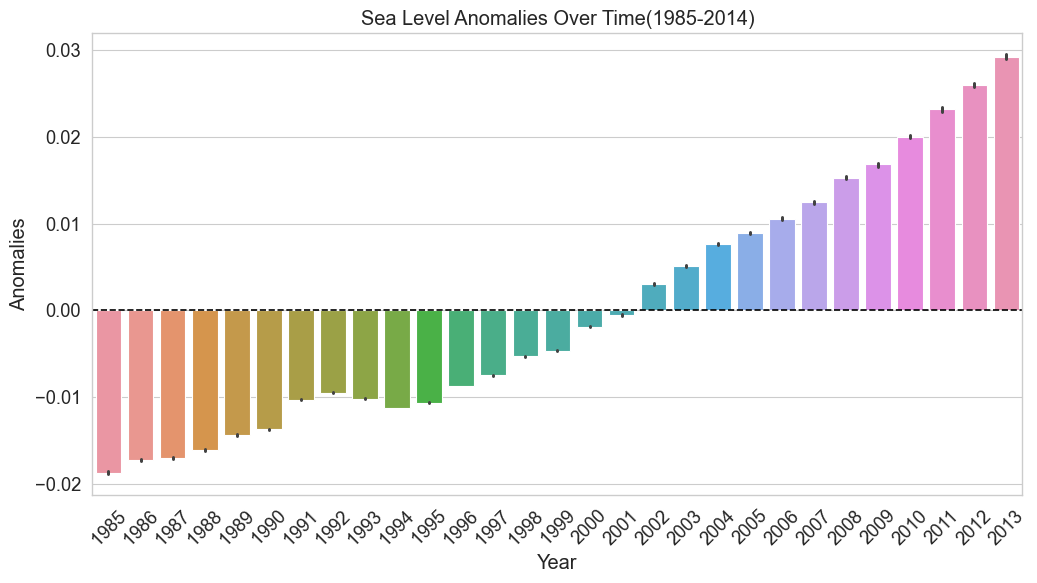

In [27]:
# Calculating the anomalies
historical_avg = df_0['mean_sea_level'].mean()
df_0['anomalies'] = df_0['mean_sea_level'] - historical_avg

# Plotting the anomalies
plt.figure(figsize=(12, 6))
sns.barplot(x='year', y='anomalies', data=df_0)
plt.axhline(0, color='k', linestyle='--')
plt.title('Sea Level Anomalies Over Time(1985-2014)')
plt.xlabel('Year')
plt.ylabel('Anomalies')
plt.xticks(rotation=45)
plt.show()


Text(0.5, 0, 'Mean Sea Level')

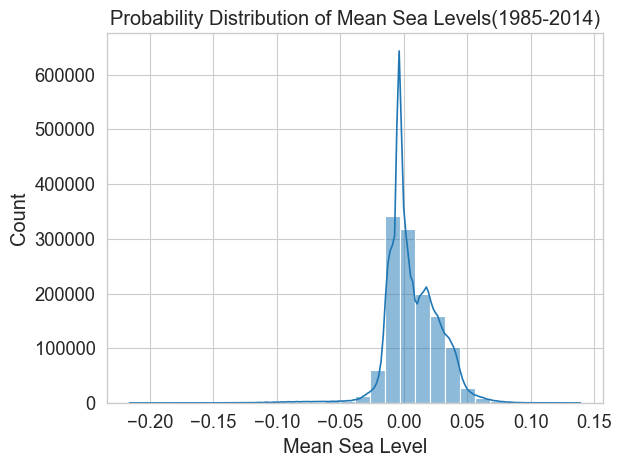

In [28]:
sns.histplot(df_0['mean_sea_level'], bins=30, kde=True)
plt.title('Probability Distribution of Mean Sea Levels(1985-2014)')
plt.xlabel('Mean Sea Level')

Text(0.5, 0, 'Mean Sea Level')

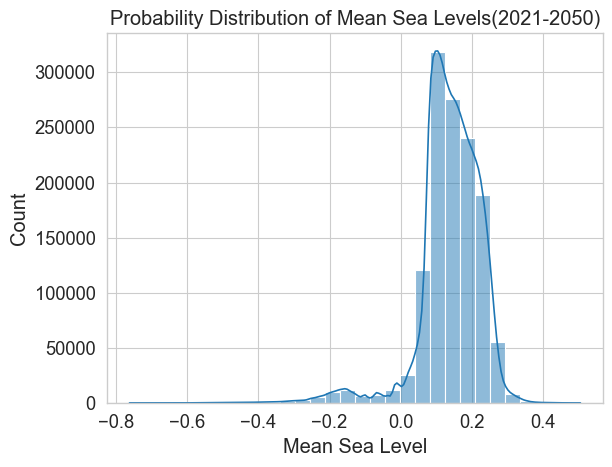

In [29]:
sns.histplot(df_1['mean_sea_level'], bins=30, kde=True)
plt.title('Probability Distribution of Mean Sea Levels(2021-2050)')
plt.xlabel('Mean Sea Level')

In [19]:
df.head()

station_x_coordinate  station_y_coordinate  \
stations time                                                     
0        2021-01-01                24.089                34.827   
         2022-01-01                24.089                34.827   
         2023-01-01                24.089                34.827   
         2024-01-01                24.089                34.827   
         2025-01-01                24.089                34.827   

                     mean_sea_level  year  anomalies  
stations time                                         
0        2021-01-01           0.079  2021  -0.060414  
         2022-01-01           0.084  2022  -0.055414  
         2023-01-01           0.089  2023  -0.050414  
         2024-01-01           0.094  2024  -0.045414  
         2025-01-01           0.099  2025  -0.040414

In [ ]:
ds.close()